In [13]:
import pickle
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rc('font',family='Times New Roman')

# Load data

In [2]:
data_list = list(csv.reader(open('data/pse_12years_2hrs.csv', 'r'), delimiter = ';'))
data_list.pop(0)
data = np.array([float(x) for x in np.transpose(data_list)[3]])

# График потребления электроэнергии за 1 месяц

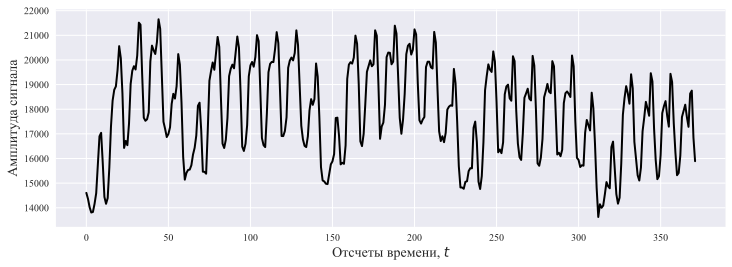

In [18]:
plt.figure(figsize=(12,4))
#plot(xi,y,'r-', 'Linewidth', 2); 
#plot(xi,y,'b.', 'MarkerSize', 12);
#plt.axis('tight')
plt.plot(data[:12 * 31], linewidth = 2, c = 'black')
plt.axis('tight')
plt.ylabel('Амплитуда сигнала', FontSize =  14)
plt.xlabel('Отсчеты времени, $t$', fontsize = 14)
plt.savefig('file1.eps')
#plt.title('График потребления электроэнергии')

# График потребления электроэнергии за 3 года


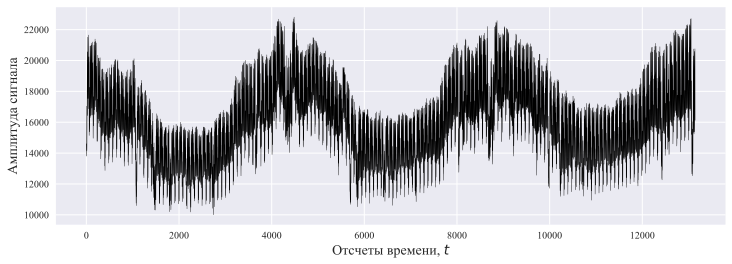

In [19]:
plt.figure(figsize=(12,4))
#plot(xi,y,'r-', 'Linewidth', 2); 
#plot(xi,y,'b.', 'MarkerSize', 12);
#plt.axis('tight')
plt.plot(data[:12 * 365 * 3], linewidth = 0.4, c = 'black')
plt.axis('tight')
plt.ylabel('Амплитуда сигнала', FontSize =  14)
plt.xlabel('Отсчеты времени, $t$', fontsize = 14)
plt.savefig('file.eps')
#plt.title('График потребления электроэнергии')



# Saving data

In [5]:
def save(file_name, sample):
    file = open(file_name,'w')
    for y in sample:
        file.writelines(str(y)+'\n')
    file.close()
    
train_file = 'data/data.txt'

save(train_file, data)

# Построение матрицы плана PLS

In [6]:
#загрузка данных
#period -- число признаков

f = open('data/data.txt')
data = np.transpose([float(line) for line in f])
period = 12

n = period * 10 #длина истории
r = period #горизонт прогнозирования
m = 10 #размер выборки
l = 3 #размер обучающей выборки
c = m - l #размер контрольной выборки
start = 7200 #start > year data = 365 * 12, start :: 12

a = np.array(range(12)) 
b = np.array(range(8 * 12)) - 8 * 12
mask = np.hstack((a - 365 * 12, a - 31 * 12, b))

Yl = np.array([data[start + 0 + period * i: start + 0 + period * i + r] for i in range(l)])
Yc = np.array([data[start + period * (l + i): start + period * (l + i) + r] for i in range(c)])
Xl = np.array([ [data[start + period * i + j] for j in mask] for i in range(l)])
Xc = np.array([ [data[start + period * (i + l) + j] for j in mask] for i in range(c)])

# Построение матрицы плана QP

In [7]:
#загрузка данных
#period -- число признаков

f = open('data/data.txt')
data = np.transpose([float(line) for line in f])
period = 12

a = np.array(range(12)) 
b = np.array(range(8 * 12)) - 8 * 12
mask = np.hstack((a - 365 * 12, a - 31 * 12, b))

# T -- размер обучающей выборки
# n -- размер тестовой выборки
T = 3
n = 7
start = 7200

Y = np.array([data[start + period * i] for i in range(T)])
X = np.array([[data[start + period * i + j] for j in mask] for i in range(T)])

test_Y = np.array([data[start + period * (i + T)] for i in range(n)])
test_X = np.array([ [data[start + period * (i + T) + j] for j in mask] for i in range(n)])

In [8]:
k = 36000
print(data_list[k])
print(data_list[k + 7 * 12])
print(data_list[k + 31 * 12])
print(data_list[k + 365 * 12])
print(data_list[k + 3650 * 12])

['2010-03-20', '2', '0', '14835.10']
['2010-03-27', '2', '0', '13854.10']
['2010-04-20', '3', '0', '14266.60']
['2011-03-20', '2', '0', '14292.20']


IndexError: list index out of range